# Combining range and angles for improved localizatioin

## Recreation of plots used in the paper

In [1]:
#Useful imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, asin, acos, atan
%reload_ext autoreload
%autoreload 2
from matplotlib import rc
rc('font',**{'family':'dejavu-sans','sans-serif':['Helvetica']})
rc('text', usetex=True)

## Heterogenous Information

In [5]:
import os
import json

# choose what you want to plot.
FOLDER = 'reproduce_test'
methods = ['CDM','constrained E-MDS','E-MDS','MDS']
N = 5
d = 2
n_it = 2 #100

# find times with correct options:
times = []
n_its = {}
good_options = None
for f in os.listdir(FOLDER):
    if f.startswith('options_'):
        filename = '{}/{}'.format(FOLDER, f)
        with open(filename, 'r') as options_file:
            print('loading',filename)
            options = json.load(options_file)
        if options['N']==N and options['d']==d and options['n_it']==n_it:
            print(options)
            time = f[-15:-5]
            n_its[str(time)] = options['n_it']
            times.append(time)
            good_options = options
print('identified times:',times)
print('n_its',n_its)

loading reproduce_test/options_1524016122.json
{'N': 5, 'd': 2, 'min_rho': 0.01, 'max_sigma': 0.5, 'gaussian': True, 'n_rhos': 4, 'print_out': False, 'n_it': 2, 'min_sigma': 0.01, 'n_sigma': 3, 'max_rho': 0.5}
loading reproduce_test/options_1524015551.json
{'N': 5, 'min_rho': 0.01, 'max_sigma': 0.5, 'gaussian': True, 'n_rhos': 4, 'n_sigma': 3, 'print_out': False, 'n_it': 2, 'min_sigma': 0.01, 'd': 2, 'max_rho': 0.5}
identified times: ['1524016122', '1524015551']
n_its {'1524016122': 2, '1524015551': 2}


In [6]:
# read results
linestyles = ['-','-.',':','--','-']
markerstyle = ('o', 's', '^', '*', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
dict_methods = {m:{'rmses':'','linestyle':linestyles[i], 'marker':markerstyle[i]} 
                for i,m in enumerate(methods)}
name = 'rmses_{}_{}'
for key in dict_methods.keys():
    total_n_it = 0
    for time in times:
        try: 
            new_data = np.load(FOLDER+'/'+name.format(key, time)+'.npy')
            print('loading {}/'.format(FOLDER) +name.format(key, time)+'.npy')
            try:
                dict_methods[key]['rmses'] += n_its[time] * new_data
            except TypeError:
                dict_methods[key]['rmses'] = n_its[time] * new_data
            total_n_it += n_its[time]
        except:
            print('could not find new data')
    if total_n_it > 0:
        dict_methods[key]['rmses'] /= total_n_it
    else:
        raise NameError('Could not find any results for method', key)
        

loading reproduce_test/rmses_constrained E-MDS_1524016122.npy
loading reproduce_test/rmses_constrained E-MDS_1524015551.npy
loading reproduce_test/rmses_E-MDS_1524016122.npy
loading reproduce_test/rmses_E-MDS_1524015551.npy
loading reproduce_test/rmses_CDM_1524016122.npy
could not find new data
loading reproduce_test/rmses_MDS_1524016122.npy
loading reproduce_test/rmses_MDS_1524015551.npy


In [7]:
# Parse options from file.
from run_simulation import parse_options, parse_options_gaussian

if options['gaussian']:
    sigmas, rhos, __ = parse_options_gaussian(good_options)
    epsilons = rhos
    noise_label = '\sigma_a'
else:
    sigmas, rhos, __ = parse_options(good_options)
    epsilons = get_epsilons(rhos)
    noise_label = '\epsilon'


/home/kiki/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/kiki/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


IndexError: index 10 is out of bounds for axis 1 with size 4

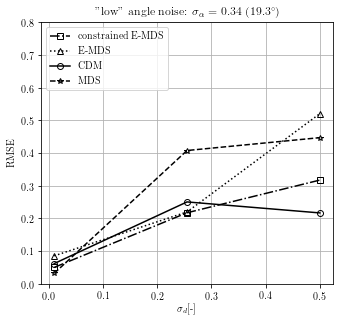

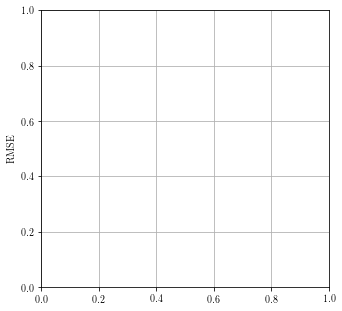

In [8]:
# Plot results against distance error

from plots import plot_against_distance

chosen_eps = [2] #[2,10] #[0, 2, 10]
saveas = '{}/low_angle_noise_N{}_d{}_deg.eps'.format(FOLDER, N, d)
title = '"low" angle noise: $\sigma_\\alpha={0:.2f}$ (${1:.1f}^\circ$)'
plot_against_distance(dict_methods, chosen_eps, epsilons, sigmas, saveas, title, legend=True)

chosen_eps = [10] #[2,10] #[0, 2, 10]
saveas = '{}/high_angle_noise_N{}_d{}_deg.eps'.format(FOLDER, N, d)
title = '"high" angle noise: $\sigma_\\alpha={0:.2f}$ (${1:.1f}^\circ)$'
plot_against_distance(dict_methods, chosen_eps, epsilons, sigmas, saveas, title)

/home/kiki/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


constrained E-MDS
E-MDS
CDM
MDS
constrained E-MDS


/home/kiki/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


IndexError: index 3 is out of bounds for axis 0 with size 3

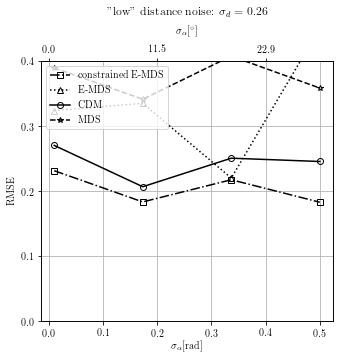

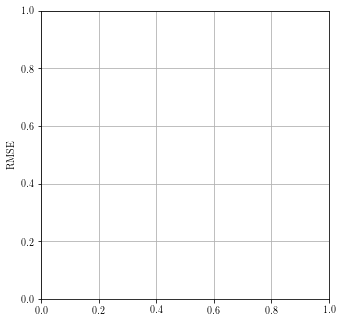

In [9]:
# plot results against angle error

from plots import plot_against_angles
chosen_sig = [1] #[0, 9] #[0, 3, 9]
title = '"low" distance noise: $\sigma_d={:2.2f}$'
saveas = '{}/low_distance_noise_N{}_d{}_deg2.eps'.format(FOLDER, N, d)
plot_against_angles(dict_methods, chosen_sig, sigmas, epsilons, saveas, title, legend=True, gaussian=options['gaussian'])

chosen_sig = [3] #[0, 9] #[0, 3, 9]
title = '"high" distance noise: $\sigma_d={:2.2f}$'
saveas = '{}/high_distance_noise_N{}_d{}_deg2.eps'.format(FOLDER, N, d)
plot_against_angles(dict_methods, chosen_sig, sigmas, epsilons, saveas, title, gaussian=options['gaussian'])

In [ ]:
from plots import plot_seaborn

plot_seaborn(dict_methods, options, 'SDM', folder=FOLDER, ylabel=True, vmin=0, vmax=.4, cbar=False, square=True)
plot_seaborn(dict_methods, options, 'constrained E-MDS', folder=FOLDER, vmin=0, vmax=.4, square=True)

difference = dict_methods['SDM']['rmses'] - dict_methods['constrained E-MDS']['rmses']
plot_seaborn(dict_methods, options, 'difference CDM - constrained E-MDS', folder=FOLDER, matrix=difference, figsize=(10,5), ylabel=True, center=0, square=False)

## Algorithm testing

In [ ]:
def evaluate(KE, real_KE):
    print('comparing:',KE[:2,:2])
    print('with:',real_KE[:2,:2])
    print('rank:',np.linalg.matrix_rank(KE, tol=1e-10))
    eigvals = np.sort(np.linalg.eigvalsh(KE))
    print('eigenvalues:',eigvals)
    print('abs sum of all but d biggest:',np.sum(np.abs(eigvals[:-d])))
    print('error:',np.linalg.norm(KE-real_KE))
    print('constraints error:', np.linalg.norm(C.dot(KE)-b))

import numpy as np
from pylocus.point_set import HeterogenousSet, get_V, dmi_from_V, sdm_from_dmi
from pylocus.basics import vector_from_matrix
N = 6
d = 2
points = HeterogenousSet(N, d)
points.set_points('normal')

noise_angles = 0.01
noise_distances = 0.01

angles_original = vector_from_matrix(points.abs_angles)
dm_original = points.dm

angles_noisy = angles_original + np.random.normal(scale=noise_angles, size=angles_original.shape)
dm_noisy = dm_original + np.random.normal(scale=noise_distances, size=dm_original.shape)

Vnoisy = get_V(angles_noisy, dm_noisy)

#newEMDS
KE_noisy = Vnoisy.dot(Vnoisy.T)
    
C, b = points.get_KE_constraints()
assert np.allclose(C.dot(points.KE), b)
print('before:')
evaluate(KE_noisy, points.KE)
evaluate(KE_noisy, points.KE)

In [ ]:
from pylocus.mds import relaxedEMDS

Xhat, Vhat = relaxedEMDS(points.points[0,:], N=points.N, d=points.d, C=C, b=b, KE=KE_noisy)
KE_new = Vhat.dot(Vhat.T)

evaluate(KE_new, points.KE)

In [ ]:
from cvxpy import *
def clean_angles(Om):
    E = len(Om)
    X = Semidef(E)
    Noise = Variable(E, E) 

    #constraints = [C[i,:] * X == b[i] for i in range(C.shape[0])]
    constraints = [X + Noise == Om] # include weighting matrix? 
    [constraints.append(X[i,i] == 1.0) for i in range(E)]

    obj = Minimize(trace(X) + norm(Noise))
    prob = Problem(obj, constraints)

    print('available:',installed_solvers())
    #total_cost = prob.solve(solver='SCS',verbose=True, eps=1e-10)
    #total_cost = prob.solve(solver='CVXOPT',verbose=True, 
    #                        abstol=1e-10, reltol=1e-8, feastol=1e-10,
    #                        kktsolver="robust")
    total_cost = prob.solve(solver='CVXOPT',verbose=True, 
                            kktsolver="robust")
    print('status:',prob.status)
    if X.value is not None:
        return X.value, Noise.value
    
noisy_Om = points.Om + np.random.normal(scale=0.01)
np.fill_diagonal(noisy_Om, 1.0)
print('noise before:', np.linalg.norm(noisy_Om - points.Om))
cleaned_Om, Noise = clean_angles(noisy_Om)
assert np.alltrue(cleaned_Om == cleaned_Om.T)
eigvals = np.linalg.eigvalsh(cleaned_Om) 
eigvals[np.abs(eigvals) < 1e-4] = 0.0
assert (eigvals >= 0).all(), 'eigvals:{}'.format(np.linalg.eigvalsh(cleaned_Om))
from pylocus.plots_cti import plot_matrix
plot_matrix(Noise, title='Noise')
plot_matrix(cleaned_Om, title='Cosines')
print('noise after:', np.linalg.norm(cleaned_Om - points.Om))

In [ ]:
from pylocus.mds import iterativeEMDS
__, Vhat_KE = iterativeEMDS(points.points[0,:], points.N, points.d,
                           C, b, KE=KE_noisy, print_out=True)
KE_old = Vhat_KE.dot(Vhat_KE.T)
print('old')
evaluate(KE_old, points.KE)